In [302]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
# machine learning    
from sklearn.linear_model import LogisticRegression
import sklearn.linear_model as lm
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from boto.sns.connection import SNSConnection
from pandas.core.common import _isnull, notnull


In [303]:
#combine test and train data
train_df = pd.read_csv('C:/Users/sunny/Desktop/ML-NG/kaggle/titanic/train.csv')
test_df= pd.read_csv('C:/Users/sunny/Desktop/ML-NG/kaggle/titanic/test.csv')
combine = [train_df, test_df]
#print(train_df.info())  891*12
#print('_'*40)
#print(test_df.info())    481*11


In [304]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)
combine = [train_df,test_df]

train_df['Cabin']=train_df.Cabin.fillna('N')
test_df['Cabin']=test_df.Cabin.fillna('N')
for dataset in combine:    
    dataset.loc[ dataset['Cabin']=='N', 'Cabin'] = 0
    dataset.loc[ dataset['Cabin']!=0, 'Cabin'] = 1
    
train_df['Cabin']=train_df.Cabin.astype(int)
test_df['Cabin']=test_df.Cabin.astype(int)
print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1]. shape)




After (891, 11) (418, 10) (891, 11) (418, 10)


In [305]:

#print(train_df.describe())
#print(train_df.describe(include=['O ']))
#print(train_df[['Pclass','Survived']].groupby(['Pclass']).mean())
#print(train_df[['Sex','Survived']].groupby(['Sex']).mean())
#print(train_df[['Parch','Survived']].groupby(['Parch']).mean())

#g=sns.FacetGrid(train_df,col='Survived')
#g.map(plt.hist, 'Fare', bins=20)  

#grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
#grid.map(plt.hist, 'Age', alpha=.5, bins=20)
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')

print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)


Before (891, 11) (418, 10) (891, 11) (418, 10)


In [306]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

print(pd.crosstab(train_df['Title'], train_df['Sex']))


Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


In [307]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
     'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
print(train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())


    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


In [308]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

print(train_df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare  Cabin Embarked  Title  
0      0   7.2500      0        S      1  
1      0  71.2833      1        C      3  
2      0   7.9250      0        S      2  
3      0  53.1000      1        S      3  
4      0   8.0500      0        S      1  


In [309]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

print(train_df.head())


   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Cabin Embarked  Title
0         0       3    0  22.0      1      0   7.2500      0        S      1
1         1       1    1  38.0      1      0  71.2833      1        C      3
2         1       3    1  26.0      0      0   7.9250      0        S      2
3         1       1    1  35.0      1      0  53.1000      1        S      3
4         0       3    0  35.0      0      0   8.0500      0        S      1


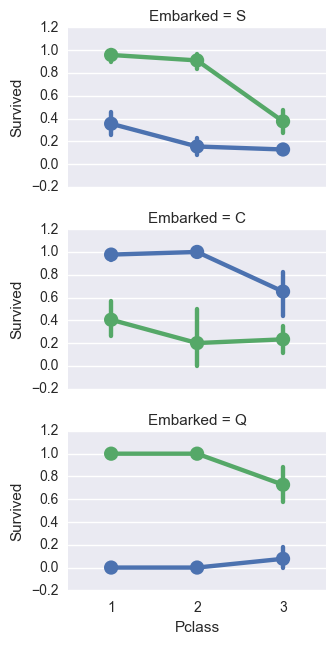

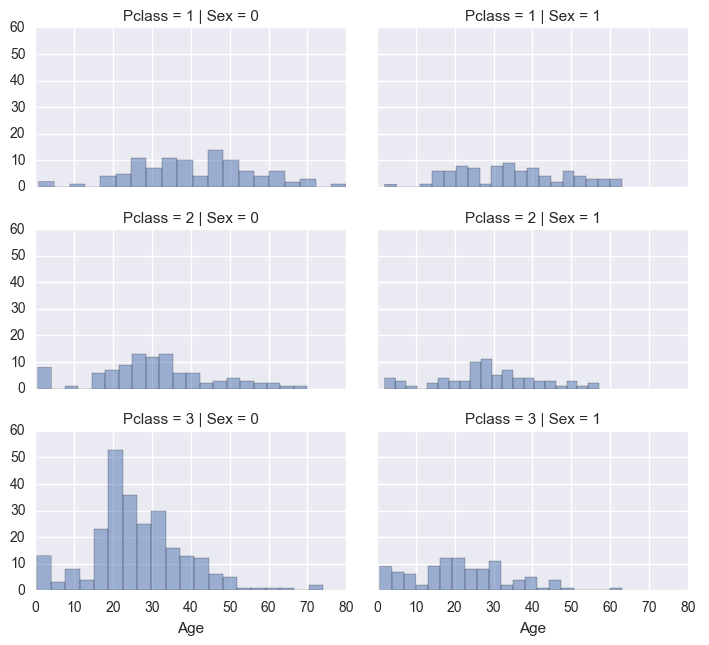

In [310]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()
sns.plt.show()


In [311]:
guess_ages = np.zeros((2,3))

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()#

            # Convert random age float to nearest .5 age
           # guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)
def pred_age(X,Z):
    age_test =X[X.Age.isnull()]
    age_train=X[X.Age.notnull()]
    ageZ_t = Z[Z.Age.notnull()]
    ageZ_test = Z[Z.Age.isnull()]
    ageZX_test = ageZ_test[['Pclass','Title','Sex']]
    md = lm.LinearRegression()
    ageX_train=age_train[['Pclass','Title','Sex']]
    ageY_train = age_train['Survived']
    md.fit(ageX_train,ageY_train)
    ageX_test = age_test[['Pclass','Title','Sex']]
    age_test['Age']=md.predict(ageX_test)
    ageZ_test['Age']=md.predict(ageZX_test)
    age_final2 = ageZ_t.append(ageZ_test)
    age_final2['Age' ] = age_final2['Age'].astype(int)
    age_final1=age_test.append(age_train)
    age_final1['Age' ] = age_final1['Age'].astype(int)
    return age_final1,age_final2
print(train_df.head())


   Survived  Pclass  Sex  Age  SibSp  Parch     Fare  Cabin Embarked  Title
0         0       3    0   22      1      0   7.2500      0        S      1
1         1       1    1   38      1      0  71.2833      1        C      3
2         1       3    1   26      0      0   7.9250      0        S      2
3         1       1    1   35      1      0  53.1000      1        S      3
4         0       3    0   35      0      0   8.0500      0        S      1


In [312]:

train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
print(train_df.head())


   Survived  Pclass  Sex  Age  SibSp  Parch     Fare  Cabin Embarked  Title  \
0         0       3    0    1      1      0   7.2500      0        S      1   
1         1       1    1    2      1      0  71.2833      1        C      3   
2         1       3    1    1      0      0   7.9250      0        S      2   
3         1       1    1    2      1      0  53.1000      1        S      3   
4         0       3    0    2      0      0   8.0500      0        S      1   

    AgeBand  
0  (16, 32]  
1  (32, 48]  
2  (16, 32]  
3  (32, 48]  
4  (32, 48]  


In [313]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
print(train_df.head())    

for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)


   Survived  Pclass  Sex  Age  SibSp  Parch     Fare  Cabin Embarked  Title
0         0       3    0    1      1      0   7.2500      0        S      1
1         1       1    1    2      1      0  71.2833      1        C      3
2         1       3    1    1      0      0   7.9250      0        S      2
3         1       1    1    2      1      0  53.1000      1        S      3
4         0       3    0    2      0      0   8.0500      0        S      1


,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [314]:
#for dataset in combine:
#    dataset['IsAlone'] = 0
#    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

#print(train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())


train_df = train_df.drop(['Parch', 'SibSp'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp'], axis=1)
combine = [train_df, test_df]
#for dataset in combine:
#    dataset['Age*Class'] = dataset.Age * dataset.Pclass

#train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

freq_port = train_df.Embarked.dropna().mode()[0]

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()



,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1,7.2500,0,0,1,2
1,1,1,1,2,71.2833,1,1,3,2
2,1,3,1,1,7.9250,0,0,2,1
3,1,1,1,2,53.1000,1,0,3,2
4,0,3,0,2,8.0500,0,0,1,1


In [315]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()


,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2,7.8292,0,2,1,1
1,893,3,1,2,7.0000,0,0,3,2
2,894,2,0,3,9.6875,0,2,1,1
3,895,3,0,1,8.6625,0,0,1,1
4,896,3,1,1,12.2875,0,0,3,3


In [316]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)


In [317]:
combine = [train_df, test_df]
    
print(train_df.head(10))   

X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape   


   Survived  Pclass  Sex  Age  Fare  Cabin  Embarked  Title  FamilySize
0         0       3    0    1     0      0         0      1           2
1         1       1    1    2     3      1         1      3           2
2         1       3    1    1     1      0         0      2           1
3         1       1    1    2     3      1         0      3           2
4         0       3    0    2     1      0         0      1           1
5         0       3    0    0     1      0         2      1           1
6         0       1    0    3     3      1         0      1           1
7         0       3    0    0     2      0         0      4           5
8         1       3    1    1     1      0         0      3           3
9         1       2    1    0     2      0         1      3           2


((891, 8), (891,), (418, 8))

In [318]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

In [319]:
# Random Forest
Y_pred_log = np.zeros((X_train.shape[0],1))
Y_pred_random= np.zeros((X_train.shape[0],1))
Y_pred_svm = np.zeros((X_train.shape[0],1))
Y_pred_knn = np.zeros((X_train.shape[0],1))
Y_pred_abc = np.zeros((X_train.shape[0],1))

abc=AdaBoostClassifier(n_estimators=50, learning_rate=1.0,random_state=5) 
random_forest = RandomForestClassifier(n_estimators=100)
linear_svc = LinearSVC()
knn = KNeighborsClassifier(n_neighbors = 5)
log= lm.LogisticRegression()

for (train,test) in kf.split(X_train,Y_train):
    random_forest.fit(X_train.iloc[train],Y_train.iloc[train])
    linear_svc.fit(X_train.iloc[train],Y_train.iloc[train])
    knn.fit(X_train.iloc[train],Y_train.iloc[train])
    log.fit(X_train.iloc[train],Y_train.iloc[train])
    abc.fit(X_train.iloc[train],Y_train.iloc[train])
    
    Y_pred_random[test,0] = random_forest.predict(X_train.iloc[test])
    Y_pred_log[test,0] = log.predict(X_train.iloc[test])
    Y_pred_svm[test,0] = linear_svc.predict(X_train.iloc[test])
    Y_pred_knn[test,0] = knn.predict(X_train.iloc[test])
    Y_pred_abc[test,0] = abc.predict(X_train.iloc[test])
    

In [320]:
random_forest.fit(X_train,Y_train)
abc.fit(X_train,Y_train)
linear_svc.fit(X_train,Y_train)
knn.fit(X_train,Y_train)
log.fit(X_train,Y_train)
Y_pred_test_log = log.predict(X_test)
Y_pred_test_rf = random_forest.predict(X_test)
Y_pred_test_svm = linear_svc.predict(X_test)
Y_pred_test_knn = knn.predict(X_test)
Y_pred_test_abc = abc.predict(X_test)
base_pred_test = pd.DataFrame({'Adaboost':Y_pred_test_abc.ravel(),'SVM':Y_pred_test_svm.ravel(),'RandomForest':Y_pred_test_rf.ravel(),'LogReg':Y_pred_test_log.ravel(),'KNN':Y_pred_test_knn.ravel()})
base_pred_test.head()

,Adaboost,KNN,LogReg,RandomForest,SVM
0,0,0,0,0,0
1,1,0,1,0,1
2,0,0,0,0,0
3,0,0,0,0,0
4,1,1,1,1,1


In [321]:
base_pred_train = pd.DataFrame({'Adaboost':Y_pred_abc.ravel(),'SVM':Y_pred_svm.ravel(),'RandomForest':Y_pred_random.ravel(),'LogReg':Y_pred_log.ravel(),'KNN':Y_pred_knn.ravel()})
base_pred_train.head()

,Adaboost,KNN,LogReg,RandomForest,SVM
0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0
2,1.0,0.0,1.0,0.0,1.0
3,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0


In [235]:
#base_pred_train.astype(float).corr().values
frame_train = [X_train,base_pred_train]
X_train1 = pd.concat(frame_train,axis=1)
frame_test = [X_test,base_pred_test]
X_test1 = pd.concat(frame_test,axis=1)
X_train1.shape

(891, 11)

In [281]:
import os

mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'

os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
gbm = xgb.XGBClassifier(
 learning_rate = 0.009,
 n_estimators= 2000,   
 max_depth= 6,
 min_child_weight= 1,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.7,
 colsample_bytree=0.7,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(X_train, Y_train)
out_df=gbm.predict(X_test)
np.savetxt("C:/Users/sunny/Desktop/ML-NG/kaggle/titanic/xgb.csv",out_df, delimiter=",")


In [282]:
np.savetxt("C:/Users/sunny/Desktop/ML-NG/kaggle/titanic/xgb21.csv",out_df, delimiter=",")